## Testing

First thing that is to be done is to import the data and generate splits

In [66]:
# Load dataset
import pandas as pd
df = pd.read_csv('Datasets/train_cleaned.csv')
train_df = pd.read_csv('Datasets/train_cleaned2.csv')

# Split dataset into training and testing
from sklearn.model_selection import train_test_split
X_df = df['body']
y_df = df['subreddit']
y_df = y_df.map({'Toronto': 0, 'London': 1, 'Montreal': 2, 'Paris': 3})

X_train_df = train_df['body']
y_train_df = train_df['subreddit']
y_train_df = y_train_df.map({'Toronto': 0, 'London': 1, 'Montreal': 2, 'Paris': 3})

# Get distribution of classes in train and test sets
X_train, _, y_train, _ = train_test_split(X_train_df, y_train_df, random_state=42)
_, X_test, _, y_test = train_test_split(X_df, y_df, random_state=42)

In [67]:
# Print a nice confusion matrix between y_pred and y_test
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create function to plot a confusion matrix
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(6, 4))
    ax = sns.heatmap(conf_mat,
                     annot=True,  # Annotate the boxes
                     cbar=False,
                     fmt='g',
                     cmap='Blues')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

Naive Bayes Classifier

Fitting 5 folds for each of 36 candidates, totalling 180 fits


Best Parameters:  {'classifier__alpha': 0.01, 'classifier__fit_prior': False, 'vectorizer__max_features': 3000, 'vectorizer__ngram_range': (1, 1)}
Best Accuracy:  0.8738317757009346
Test Accuracy:  0.9055555555555556


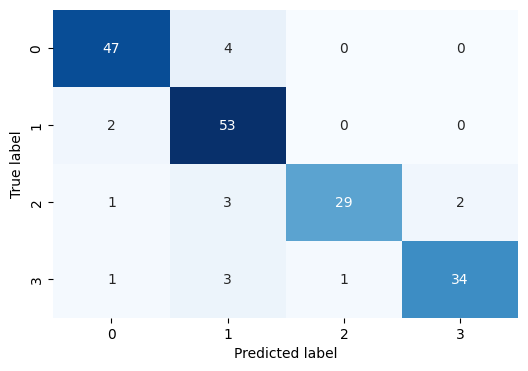

In [68]:
# Perform a thorough grid search with CountVectorizer and Naive Bayes
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline

# Define the pipeline with CountVectorizer and Multinomial Naive Bayes
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', MultinomialNB())
])

# Define the hyperparameters to search
parameters = {
    'vectorizer__max_features': [3000, 5000],  
    'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)],  # Consider different n-gram ranges
    'classifier__alpha': [0.01, 0.5, 1.0],  # Smoothing parameter for Naive Bayes
    'classifier__fit_prior': [True, False],  # Whether to learn class prior probabilities
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, parameters, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

# Evaluate on the test set
test_accuracy = grid_search.score(X_test, y_test)
print("Test Accuracy: ", test_accuracy)

y_pred = grid_search.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
plot_conf_mat(conf_mat)

Logistic Regression Classifier

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters:  {'classifier__C': 1.0, 'vectorizer__max_features': 3000, 'vectorizer__ngram_range': (1, 1)}
Best Accuracy:  0.7829352717203185
Test Accuracy:  0.8277777777777777


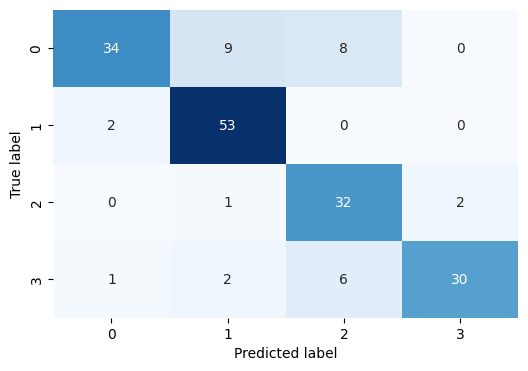

In [69]:
# Perform a thorough grid search with CountVectorizer and Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

# Define the pipeline with CountVectorizer and Logistic Regression
pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', LogisticRegression(max_iter=1000))  # Increase max_iter if needed
])

# Define the hyperparameters to search
parameters = {
    'vectorizer__max_features': [3000, 5000],  
    'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)],  # Consider different n-gram ranges
    'classifier__C': [0.1, 1.0, 10.0],  # Inverse of regularization strength
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, parameters, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train, y_train)  # Assuming X_train and y_train are your training data and labels

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

# Evaluate on the test set
test_accuracy = grid_search.score(X_test, y_test)  # Assuming X_test and y_test are your test data and labels
print("Test Accuracy: ", test_accuracy)

# Plot confusion matrix
y_pred = grid_search.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
plot_conf_mat(conf_mat)

Multi-Layer Perceptron

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best Parameters:  {'classifier__alpha': 0.001, 'classifier__hidden_layer_sizes': (200, 100, 50), 'vectorizer__ngram_range': (1, 1)}
Best Accuracy:  0.8626687435098651
Test Accuracy:  0.9166666666666666


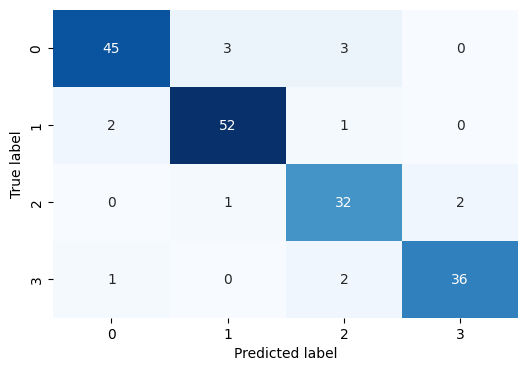

In [70]:
# Train a MLP
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Define the pipeline with CountVectorizer and Multilayer Perceptron
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(max_features=3000)),
    ('classifier', MLPClassifier())
])

# Define the hyperparameters to search
parameters = {
    'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)],  # Consider different n-gram ranges
    'classifier__hidden_layer_sizes': [(100,), (300, 150), (200, 100), (200, 100, 50), (100, 50, 25)],  # Vary hidden layer sizes
    'classifier__alpha': [0.001],  # L2 regularization strength
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, parameters, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

# Evaluate on the test set
test_accuracy = grid_search.score(X_test, y_test)
print("Test Accuracy: ", test_accuracy)

# Plot confusion matrix
y_pred = grid_search.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
plot_conf_mat(conf_mat)

SVM

Fitting 5 folds for each of 54 candidates, totalling 270 fits


Best Parameters:  {'classifier__C': 10, 'classifier__degree': 2, 'vectorizer__max_features': 3000, 'vectorizer__ngram_range': (1, 3)}
Best Accuracy:  0.7662859120803047
Test Accuracy:  0.8388888888888889


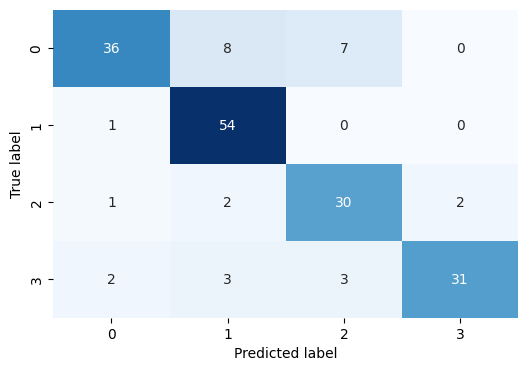

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer

svm_model = SVC()

# Define the pipeline
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', SVC())
])

parameters = {
    'vectorizer__max_features': [3000, 5000],  
    'vectorizer__ngram_range': [(1, 2), (1, 3), (1, 4)],  # Consider different n-gram ranges
    'classifier__C': [10, 20, 30],  # Regularization parameter
    'classifier__degree': [2, 3, 4],  # Degree of the polynomial kernel
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=parameters, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

# Evaluate on the test set
test_accuracy = grid_search.score(X_test, y_test)
print("Test Accuracy: ", test_accuracy)

# Plot confusion matrix
y_pred = grid_search.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
plot_conf_mat(conf_mat)

Bernoulli Naive Bayes Classifier

Fitting 5 folds for each of 27 candidates, totalling 135 fits


Best Parameters: {'classifier__estimator__alpha': 0.001, 'vectorizer__max_features': 3000, 'vectorizer__ngram_range': (1, 1)}
Accuracy: 0.9166666666666666


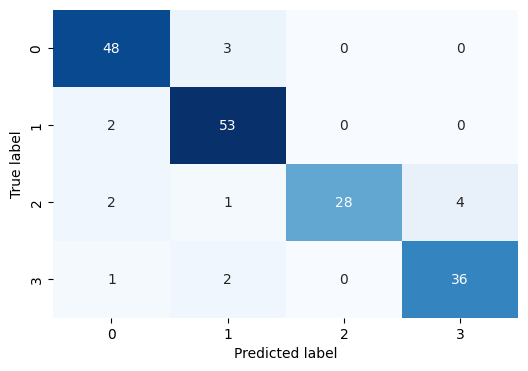

In [72]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import BernoulliNB

# Define the pipeline
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', OneVsRestClassifier(BernoulliNB())) 
])

param_grid = {
    'vectorizer__max_features': [1000, 3000, 5000], 
    'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)], 
    'classifier__estimator__alpha': [0.001, 0.5, 1.0],  
}

# Create GridSearchCV instance
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Assuming X_train, y_train, X_test, y_test are your training and test data and labels
grid_search.fit(X_train, y_train)

# Evaluate the model
accuracy = grid_search.score(X_test, y_test)
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy)

# Plot confusion matrix
y_pred = grid_search.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
plot_conf_mat(conf_mat)

# Assign model to a variable
best_model = grid_search.best_estimator_

Random Forest

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'classifier__estimator__max_depth': 50, 'classifier__estimator__n_estimators': 100, 'vectorizer__max_features': 3000, 'vectorizer__ngram_range': (1, 1)}
Accuracy: 0.85


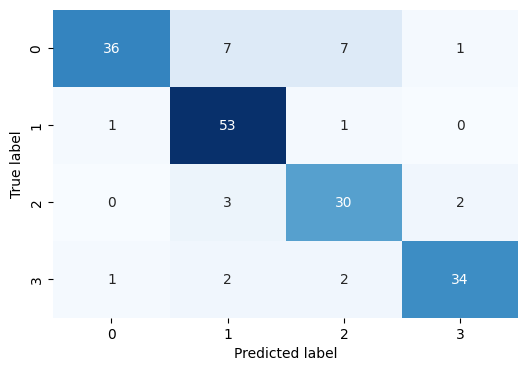

In [73]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

# Define the pipeline
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', OneVsRestClassifier(RandomForestClassifier())) 
])

param_grid = {
    'vectorizer__max_features': [500, 1000, 3000], 
    'vectorizer__ngram_range': [(1, 1), (1, 2)], 
    'classifier__estimator__n_estimators': [50, 100, 200],  
    'classifier__estimator__max_depth': [10, 20, 30, 50],
}

# Create GridSearchCV instance
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Assuming X_train, y_train, X_test, y_test are your training and test data and labels
grid_search.fit(X_train, y_train)

# Evaluate the model
accuracy = grid_search.score(X_test, y_test)
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy)

# Plot confusion matrix
y_pred = grid_search.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
plot_conf_mat(conf_mat)

Now we will use the best performing model to predict the Kaggle test set

In [76]:
# Load the best model (Bernoulli Naive Bayes)
best_model.fit(X_train, y_train)

# Load the Kaggle test set
kaggle_test = pd.read_csv('Datasets/test_cleaned.csv')

# Make predictions on the Kaggle test set
kaggle_test_pred = best_model.predict(kaggle_test['body'])

kaggle_test_dict = {
    'id': kaggle_test['id'],
    'subreddit': kaggle_test_pred
}

kaggle_test_df = pd.DataFrame(kaggle_test_dict)
kaggle_test_df['subreddit'] = kaggle_test_df['subreddit'].map({0: 'Toronto', 1: 'London', 2: 'Montreal', 3: 'Paris'})

# Save the predictions to a CSV file
kaggle_test_df.to_csv('Datasets/kaggle_test_predictions.csv', index=False)